# I. Gene Expression Features Correlation Analysis

In [ ]:
## Package 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

## google drive mount 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Dataset 출처: https://vipdue.com/python-daixie-linear-regression-for-gene-expression-prediction/

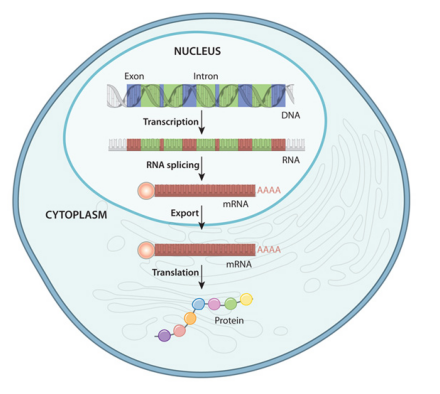

In [ ]:
asset_dir = '/content/gdrive/My Drive/Python_Programming/assets/'

column_pic = plt.imread(asset_dir + 'mrna_gene_expression.jpg')
plt.axis('off')
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(column_pic)

### Load Dataset

In [ ]:
data_dir = '/content/gdrive/My Drive/Python_Programming/dataset/mRNA/'

microRNA = pd.read_csv(data_dir + 'microRNAScore-x.csv')
microRNA_well_explain = pd.read_csv(data_dir + 'mRNA-y-well-explained.csv')
microRNA_poor_explain = pd.read_csv(data_dir + 'mRNA-y-poor-explained.csv')
tissueType = pd.read_csv(data_dir + 'cancerType-x-Categorical.csv') 

microRNA.head()

### Dataset Check

In [ ]:
microRNA.info()

In [ ]:
microRNA_well_explain.head()

In [ ]:
microRNA_poor_explain.head()

In [ ]:
tissueType

In [ ]:
tissueType["cancerType"].unique() ## 32가지

## 1. Visual Analysis

In [ ]:
## Pairplot
sns.pairplot(microRNA[['MIRC1','MIRC2','MIRC3','MIRC4','MIRC5','MIRC6','MIRC7']],hue="MIRC1") ## hue: 변수

Output hidden; open in https://colab.research.google.com to view.

## 2. Correlation Analysis

In [ ]:
microRNA_process = microRNA.drop('Unnamed: 0',axis=1) # 'Unnamed: 0' column 삭제

plt.figure(figsize=(15,15))
sns.heatmap(data = microRNA_process.corr(method = 'pearson'), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

## 3. Linear Regression

In [ ]:
sns.regplot(x='MIRC1', y='MIRC15',data=microRNA_process)

In [ ]:
sns.regplot(x='MIRC10', y='MIRC21',data=microRNA_process)

# II. Gene Expression Prediction using Machine Learning Methods (Basic)

In [ ]:
# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Dataset Splitting

In [ ]:
X = microRNA_process
y = tissueType["cancerType"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print("Number of Train-set: ",len(y_train))
print("Number of Test-set: ",len(y_test))

X_train.head()

## 2. Machine Learning Model Training, Prediction, Evaluation

In [ ]:
## (1) Model Selection
LR = LogisticRegression()
svm = SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

## (2) Model Training
LR_model = LR.fit(X_train, y_train)
SVM_model = svm.fit(X_train, y_train)
DT_model = DT.fit(X_train, y_train)
RF_model = RF.fit(X_train, y_train)

## (3) Model Prediction 
LR_predict = LR_model.predict(X_test)
SVM_predict = SVM_model.predict(X_test)
DT_predict = DT_model.predict(X_test)
RF_predict = RF_model.predict(X_test)

## (4) Model Evaluation
LR_conf_matrix = confusion_matrix(y_test, LR_predict)
LR_acc_score = accuracy_score(y_test, LR_predict)
print("\n***** Logistc Regression *****")
print("confussion matrix")
print(LR_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",LR_acc_score*100,'\n')
print(classification_report(y_test,LR_predict))

print("\n***** SVM *****")
SVM_conf_matrix = confusion_matrix(y_test, SVM_predict)
SVM_acc_score = accuracy_score(y_test, SVM_predict)
print("confussion matrix")
print(SVM_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",SVM_acc_score*100,'\n')
print(classification_report(y_test,SVM_predict))

print("\n***** Decision Tree *****")
DT_conf_matrix = confusion_matrix(y_test, DT_predict)
DT_acc_score = accuracy_score(y_test, DT_predict)
print("confussion matrix")
print(DT_conf_matrix)
print("\n")
print("Accuracy of Decision Tree:",DT_acc_score*100,'\n')
print(classification_report(y_test,DT_predict))

print("\n***** Random Forest *****")
RF_conf_matrix = confusion_matrix(y_test, RF_predict)
RF_acc_score = accuracy_score(y_test, RF_predict)
print("confussion matrix")
print(RF_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",RF_acc_score*100,'\n')
print(classification_report(y_test,RF_predict))

# III. Gene Expression Prediction using Machine Learning Methods (Advanced)

## 1. Dataset Splitting 

In [ ]:
""" class 분포 확인 """
X = microRNA_process
y = tissueType["cancerType"]

print(y.value_counts())

In [ ]:
""" 예: 100개 이하 Class 제외 """
exclude = y[(y=='KICH') | (y=='MESO') | (y=='UVM') | (y=='ACC') | (y=='READ') | (y=='UCS') | (y=='DLBC') | (y=='CHOL') | (y=='GBM')]

X_process = X.drop(exclude.index)
y_process = y.drop(exclude.index)
print(len(y), len(y_process))

In [ ]:
""" Class 간의 비율 유지: stratify """
X_train, X_test, y_train, y_test = train_test_split(X_process, y_process, test_size = 0.20, stratify = y_process, random_state = 0)

print("*** Train Dataset ***")
print(y_train.value_counts())
print("\n*** Test Dataset ***")
print('\n',y_test.value_counts())

In [ ]:
""" Over Sampling: Synthetic Minority Oversampling Technique (SMOTE) """
from collections import Counter
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_train_sm)))

## 2. Training (Hyperparameter Tuning)

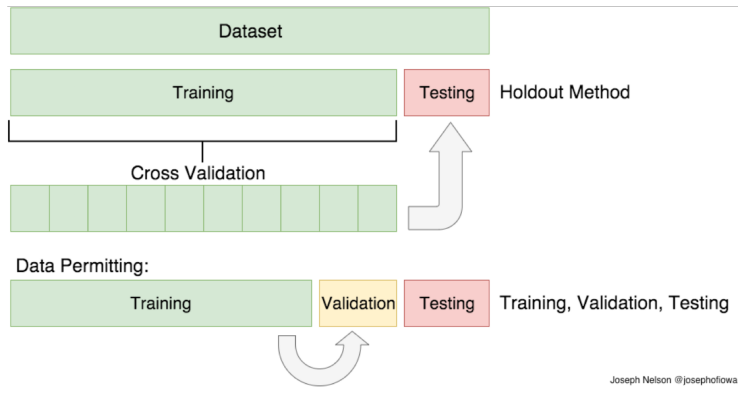

In [ ]:
column_pic = plt.imread(asset_dir + 'cv.png')
plt.axis('off')
plt.rcParams["figure.figsize"] = (15,7)
plt.imshow(column_pic)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np 

num_epoch = 10
coarse_hyperparameter_list = []


""" Random Forest """ 
for epoch in range(num_epoch):
  n_estimators =  int(np.random.uniform(50, 150))
  max_depth = int(np.random.uniform(10, 100))
  max_features = np.random.uniform(0.1, 1.0)
    
  RF_model = RandomForestClassifier(n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    max_features=max_features,
                                    n_jobs=-1,
                                    random_state=0)
    
  score = cross_val_score(RF_model, X_train_sm, y_train_sm, cv=5)
  print("epoch = {0}, n_estimators = {1}, max_depth = {2}, max_features = {3}, score = {4:.5f}" \
        .format(epoch, n_estimators, max_depth, max_features, score.mean()))

  hyperparameter = {'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'max_features': max_features,
                    'score': score.mean()}

  coarse_hyperparameter_list.append(hyperparameter)
    

coarse_hyperparameter_list = pd.DataFrame.from_dict(coarse_hyperparameter_list)
coarse_hyperparameter_list = coarse_hyperparameter_list.sort_values("score", ascending=False)
coarse_hyperparameter_list.head(10)                            

epoch = 0, n_estimators = 147, max_depth = 53, max_features = 0.1909464298608532, score = 0.96031
epoch = 1, n_estimators = 121, max_depth = 47, max_features = 0.4634166030491622, score = 0.95485
epoch = 2, n_estimators = 119, max_depth = 41, max_features = 0.8015543590737466, score = 0.94824
epoch = 3, n_estimators = 83, max_depth = 90, max_features = 0.1334826576771146, score = 0.96108
epoch = 4, n_estimators = 69, max_depth = 61, max_features = 0.6432427275624255, score = 0.94927
epoch = 5, n_estimators = 76, max_depth = 60, max_features = 0.2146627904075601, score = 0.95954
epoch = 6, n_estimators = 148, max_depth = 67, max_features = 0.17258074948764374, score = 0.96134
epoch = 7, n_estimators = 94, max_depth = 43, max_features = 0.2522768948783177, score = 0.95864
epoch = 8, n_estimators = 96, max_depth = 71, max_features = 0.25192318786005763, score = 0.95935
epoch = 9, n_estimators = 54, max_depth = 45, max_features = 0.9629242707569857, score = 0.94182


,n_estimators,max_depth,max_features,score
6,148,67,0.172581,0.961340
3,83,90,0.133483,0.961083
0,147,53,0.190946,0.960312
5,76,60,0.214663,0.959541
8,96,71,0.251923,0.959349
7,94,43,0.252277,0.958642
1,121,47,0.463417,0.954853
4,69,61,0.643243,0.949266
2,119,41,0.801554,0.948239
9,54,45,0.962924,0.941817


In [ ]:
## (1) Model Selection
RF = RandomForestClassifier(n_estimators = 148, max_depth = 67, max_features = 0.172581)

## (2) Model Training
RF_model = RF.fit(X_train_sm, y_train_sm)

## 3. Prediction and Evaluation

In [ ]:
## (3) Model Prediction 
RF_predict = RF_model.predict(X_test)

## (4) Model Evaluation
RF_conf_matrix = confusion_matrix(y_test, RF_predict)
RF_acc_score = accuracy_score(y_test, RF_predict)

print("confussion matrix")
print(RF_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",RF_acc_score*100,'\n')
print(classification_report(y_test,RF_predict))

## 4. Feature Importances

In [ ]:
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()